## Problem Overview:

* There are 922 e-mails divided equally between spam and non-spam(ham)
* The first line of every email contains the subject and the third line contains the body as shown:

![title](sample_email.png)

## Perform text analysis only on the body to detect spam mails

## Steps:
1. Read the body of all the emails. (Hint: Just google how to read multiple text files in python. Its very simple - all the text files can be read at once using a simple loop. But make sure while reading itself you read only the body (third line) and not the subject).
2. Once you read, the content of all the mails can be collected in a python list.
3. Create a pandas dataframe from that list and add the class label column [spam(1) or ham(0)]
4. The shape of the pandas dataframe must be (922 x 2) - 922 rows and 2 columns
5. Now perform the standard preprocessing steps on the contents of the mail (stopword removal, lower casing, etc.)
6. After that create vectors using Binary BOW, count BOW and TFIDF.
7. Use BernoulliNB with Binary BOW and MultinomialNB with Count BOW and TFIDF
8. Evaluate all the three methods using Accuracy, Confusion Matrix and F-1 Score.
9. Compare the results of the three methods

### Reading multiple files and making list of mails

In [398]:
import glob
import errno
path='C:/Users/Rujuta Tamhankar/Desktop/ML/Spam Dataset/Ham emails/*.txt'
files=glob.glob(path)
s=[]
c=[]
for name in files:
    b=[]
    try:
        with open(name) as f:
            a=[]
            for line in f:
                a.append(line)
            b.append(a)
            for i in b:
                x,y,z=i
                #print(z)
                s=z.split("\n")
                c.append(s)
           
                
                
    except IOError as exc:
        if exc.errno !=errno.EISDIR:
            raise
c

[['> deat : sun , 15 dec 91 2 : 25 : 2 est > : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 query > > wlodek zadrozny ask " anything interest " > construction " s > np np " . . . second , > much relate : consider construction form > discuss list late reduplication ? > logical sense " john mcnamara name " tautologous thus , > level , indistinguishable " , , here ? " . \' john mcnamara name \' tautologous support those logic-base semantics irrelevant natural language . sense tautologous ? supplies value attribute follow attribute value . fact value name-attribute relevant entity \' chaim shmendrik \' , \' john mcnamara name \' false . tautology , . ( reduplication , either . )',
  ''],
 ['discussion s - > np + np remind ago read , source forget , critique newsmagazine \' unique tendency write style , most writer overly " cute " . one item tersely put down follow : " \'s favorite : colon . " - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - lee hartma

In [399]:
path='C:/Users/Rujuta Tamhankar/Desktop/ML/Spam Dataset/Spam emails/*.txt'
files=glob.glob(path)
t=[]
d=[]
for name in files:
    b=[]
    try:
        with open(name) as f:
            a=[]
            for line in f:
                a.append(line)
            b.append(a)
            for i in b:
                x,y,z=i
                #print(z)
                t=z.split("\n")
                d.append(t)
                #print(s)
                
                
    except IOError as exc:
        if exc.errno !=errno.EISDIR:
            raise
d

[['* * * * * * * * * * * * * * * display box credit application need place small owner-operate store area . here : 1 . introduce yourself store owner manager . 2 . our 90 % effective script tell little display box save customer hundred dollar , draw card business , $ 5 . 0 $ 15 . 0 every app send . 3 . spot counter , place box , nothing need , need name address company send commission check . compensaation $ 10 every box place . become representative earn commission $ 10 each application store . course much profitable plan , pay month small effort . call 1-888 - 703-5390 code 3 24 hours receive detail ! ! * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * removed our mailing l

### Creating dataframes of hams and spams and adding label column

In [400]:
df1 = pd.DataFrame(data=c,columns=['Emails','class_label'])
df1['class_label']=0
df1

,Emails,class_label
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0
1,"discussion s - > np + np remind ago read , sou...",0
2,". . . 's much restrictive s - > np np . 's "" ""...",0
3,""" listserv "" international conference 1992 sec...",0
4,anyone point book article causative constructi...,0
5,graduate student education approach colleague ...,0
6,undergraduate course shortly teach psycholingu...,0
7,on-line corpus modern german . information app...,0
8,"hi , help ! design experiment mandarin tone pa...",0
9,linguistic program university utah invite appl...,0


In [401]:
import numpy as np
import pandas as pd
df2 = pd.DataFrame(data=d,columns=['Emails','class_label'])
df2['class_label']=1
df2

,Emails,class_label
0,* * * * * * * * * * * * * * * display box cred...,1
1,"dear nlpeople , ' m sure ' ll agree auto insur...",1
2,"want best hunt camp vacation life , felton 's ...",1
3,57 million email addresses $ 99 want money ? p...,1
4,attention ! warn ! adult ! warn ! adult ! unde...,1
5,attention ! warn ! adult ! warn ! adult ! unde...,1
6,subject : re : are debt ? help . qualify finge...,1
7,= = = = = = = = = = = = = = = = = = = = = = = ...,1
8,57 million email addresses $ 99 want money ? p...,1
9,$ 3500 per week home computer ! put free softw...,1


### Concatenating df1 ,df2 to get final df

In [402]:
df=df1.append(df2,ignore_index='True')
df

,Emails,class_label
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0
1,"discussion s - > np + np remind ago read , sou...",0
2,". . . 's much restrictive s - > np np . 's "" ""...",0
3,""" listserv "" international conference 1992 sec...",0
4,anyone point book article causative constructi...,0
5,graduate student education approach colleague ...,0
6,undergraduate course shortly teach psycholingu...,0
7,on-line corpus modern german . information app...,0
8,"hi , help ! design experiment mandarin tone pa...",0
9,linguistic program university utah invite appl...,0


In [403]:
df.tail()

,Emails,class_label
957,congratulation ! ' ve select enter vacation ad...,1
958,http : / / capitalfm . com - extravaganza 1999...,1
959,spam ; receive message member safemail list . ...,1
960,spam ; receive message member safemail list . ...,1
961,dear internet user : dear internet user : soun...,1


### Removing Duplicates

In [404]:
df=df.drop_duplicates(subset='Emails', keep=False, inplace=False)
df

,Emails,class_label
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0
1,"discussion s - > np + np remind ago read , sou...",0
2,". . . 's much restrictive s - > np np . 's "" ""...",0
3,""" listserv "" international conference 1992 sec...",0
4,anyone point book article causative constructi...,0
5,graduate student education approach colleague ...,0
6,undergraduate course shortly teach psycholingu...,0
7,on-line corpus modern german . information app...,0
8,"hi , help ! design experiment mandarin tone pa...",0
9,linguistic program university utah invite appl...,0


### Reset Index

In [405]:
df=df.reset_index(level=None,drop=True,inplace=False)
df

,Emails,class_label
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0
1,"discussion s - > np + np remind ago read , sou...",0
2,". . . 's much restrictive s - > np np . 's "" ""...",0
3,""" listserv "" international conference 1992 sec...",0
4,anyone point book article causative constructi...,0
5,graduate student education approach colleague ...,0
6,undergraduate course shortly teach psycholingu...,0
7,on-line corpus modern german . information app...,0
8,"hi , help ! design experiment mandarin tone pa...",0
9,linguistic program university utah invite appl...,0


### Preprocessing

In [406]:
import re
i = 0
for sen in df['Emails'].values:
    if(len(re.findall('<.*?>', sen))):
        print(sen,"\n\n")
        i += 1
    if i == 5:
        break

> deat : sun , 15 dec 91 2 : 25 : 2 est > : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 query > > wlodek zadrozny ask " anything interest " > construction " s > np np " . . . second , > much relate : consider construction form > discuss list late reduplication ? > logical sense " john mcnamara name " tautologous thus , > level , indistinguishable " , , here ? " . ' john mcnamara name ' tautologous support those logic-base semantics irrelevant natural language . sense tautologous ? supplies value attribute follow attribute value . fact value name-attribute relevant entity ' chaim shmendrik ' , ' john mcnamara name ' false . tautology , . ( reduplication , either . ) 


number month ago raise issue deal human subject committee , since our department ( perceive ) hassle our own committee . receive numerous response , since forward lsa social issue ( something ) committee . response vary shock outrage anyone over our ( collective ) shoulder shock outrage consider researc

In [407]:
import nltk

In [408]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rujuta
[nltk_data]     Tamhankar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [409]:
stop = set(stopwords.words('english'))

In [410]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [411]:
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

In [412]:
def cleanhtml(sentence):
    '''This function removes all the html tags in the given sentence'''
    cleanr = re.compile('<.*?>')    ## find the index of the html tags
    cleantext = re.sub(cleanr, ' ', sentence)  ## Substitute <space> in place of any html tag
    return cleantext

In [413]:
def cleanpunc(sentence):
    '''This function cleans all the punctuation or special characters from a given sentence'''
    cleaned = re.sub(r'[?|@|!|^|%|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [414]:
def preprocessing(series):
    '''The function takes a Pandas Series object containing text in all the cells
       And performs following Preprocessing steps on each cell:
       1. Clean text from html tags
       2. Clean text from punctuations and special characters
       3. Retain only non-numeric Latin characters with lenght > 2
       4. Remove stopwords from the sentence
       5. Apply stemming to all the words in the sentence
       
       Return values:
       1. final_string - List of cleaned sentences
       2. list_of_sent - List of lists which can be used as input to the W2V model'''
    
    i = 0
    str1=" "
    final_string = []    ## This list will contain cleaned sentences
    list_of_sent = []    ## This is a list of lists used as input to the W2V model at a later stage
    
    ## Creating below lists for future use
    all_spam_words=[] # store words from spam here
    all_ham_words=[] # store words from ham here
    
    
    for sent in series.values:
        ## 
        filtered_sent = []
        sent = cleanhtml(sent)    ## Clean the HTML tags
        sent = cleanpunc(sent)    ## Clean the punctuations and special characters
        ## Sentences are cleaned and words are handled individually
        for cleaned_words in sent.split():
            ## Only consider non-numeric words with length at least 3
            if((cleaned_words.isalpha()) and (len(cleaned_words) > 2)):
                ## Only consider words which are not stopwords and convert them to lowet case
                if(cleaned_words.lower() not in stop):
                    ## Apply snowball stemmer and add them to the filtered_sent list
                    s = (sno.stem(cleaned_words.lower()))#.encode('utf-8')
                    filtered_sent.append(s)    ## This contains all the cleaned words for a sentence
                    if (df['class_label'].values)[i] == 0 :
                        all_spam_words.append(s) #list of all words used to describe hams
                    if(df['class_label'].values)[i] == 1 :
                        all_ham_words.append(s) #list of all words used to describe spams
        ## Below list is a list of lists used as input to W2V model later
        list_of_sent.append(filtered_sent)
        ## Join back all the words belonging to the same sentence
        str1 = " ".join(filtered_sent)
        ## Finally add the cleaned sentence in the below list
        final_string.append(str1)
        #print(i)
        i += 1
    return final_string, list_of_sent

In [415]:
final_string, list_of_sent = preprocessing(df['Emails'].iloc[:5])
for x in final_string:
    print(x,"\n\n")

deat sun dec est michael subject queri wlodek zadrozni ask anyth interest construct second much relat consid construct form discuss list late redupl logic sens john mcnamara name tautolog thus level indistinguish john mcnamara name tautolog support semant irrelev natur languag sens tautolog suppli valu attribut follow attribut valu fact valu relev entiti chaim shmendrik john mcnamara name fals tautolog redupl either 


discuss remind ago read sourc forget critiqu newsmagazin uniqu tendenc write style writer over cute one item ters put follow favorit colon lee hartman siucvmb bitnet depart foreign languag southern illinoi univers carbondal 


much restrict pro quit 


listserv intern confer second circular februari literatur analysi discours special attent multicultur context tuesday septemb friday septemb gent univers belgium write read literatur oral literari tradit dialog text narrat discours theori literatur social practic etc etc etc keynot speaker david birch murdoch australium ma

In [416]:
final_string, list_of_sent = preprocessing(df['Emails'])

In [417]:
df['CleanedMails']=final_string

In [418]:
df

,Emails,class_label,CleanedMails
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...
5,graduate student education approach colleague ...,0,graduat student educ approach colleagu mine qu...
6,undergraduate course shortly teach psycholingu...,0,undergradu cours short teach psycholinguist ap...
7,on-line corpus modern german . information app...,0,corpus modern german inform appreci ken beesle...
8,"hi , help ! design experiment mandarin tone pa...",0,help design experi mandarin tone part phonolog...
9,linguistic program university utah invite appl...,0,linguist program univers utah invit applic vis...


In [419]:
df.tail()

,Emails,class_label,CleanedMails
916,celebrate our 50th issue our inet review newsl...,1,celebr issu inet review newslett inet review w...
917,"sender : trinity venture , inc . address : 191...",1,sender triniti ventur inc address westmead hou...
918,congratulation ! ' ve select enter vacation ad...,1,congratul select enter vacat adventur florida ...
919,http : / / capitalfm . com - extravaganza 1999...,1,http capitalfm com extravaganza keep date acti...
920,dear internet user : dear internet user : soun...,1,dear internet user dear internet user sound fa...


### Final Processed Shuffled Dataframe

In [420]:
from sklearn.utils import shuffle

In [421]:
df=shuffle(df,random_state=345)
df

,Emails,class_label,CleanedMails
897,http : / / capitalfm . com - help london child...,1,http capitalfm com help london child miss fun ...
15,"hi , ' m work phonetics project modern irish '...",0,work phonet project modern irish hard sourc an...
884,http : / / capitalfm . com - b * witched - rea...,1,http capitalfm com witch read book extract win...
584,remove instruction below . remove request resp...,1,remov instruct remov request respect process i...
94,"dear netter , post several query few month ago...",0,dear netter post sever queri month ago ten mem...
472,call paper syllable : typology theory conferen...,0,call paper syllabl typolog theori confer repre...
152,"martin benefit doubt assume "" russian - speak ...",0,martin benefit doubt assum russian speak eston...
148,write description soundex code rule ? ' m writ...,0,write descript soundex code rule write softwar...
461,"december 17 18 , 1998 , tilburg university hos...",0,decemb tilburg univers host first intern confe...
501,horizon publish invite saltwater aquarium hobb...,1,horizon publish invit saltwat aquarium hobbyis...


In [422]:
df=df.reset_index(drop=True) #Reseting Index
df

,Emails,class_label,CleanedMails
0,http : / / capitalfm . com - help london child...,1,http capitalfm com help london child miss fun ...
1,"hi , ' m work phonetics project modern irish '...",0,work phonet project modern irish hard sourc an...
2,http : / / capitalfm . com - b * witched - rea...,1,http capitalfm com witch read book extract win...
3,remove instruction below . remove request resp...,1,remov instruct remov request respect process i...
4,"dear netter , post several query few month ago...",0,dear netter post sever queri month ago ten mem...
5,call paper syllable : typology theory conferen...,0,call paper syllabl typolog theori confer repre...
6,"martin benefit doubt assume "" russian - speak ...",0,martin benefit doubt assum russian speak eston...
7,write description soundex code rule ? ' m writ...,0,write descript soundex code rule write softwar...
8,"december 17 18 , 1998 , tilburg university hos...",0,decemb tilburg univers host first intern confe...
9,horizon publish invite saltwater aquarium hobb...,1,horizon publish invit saltwat aquarium hobbyis...


### creating vectors using Binary BOW, count BOW and TFIDF

In [423]:
from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer  

In [424]:
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(df['CleanedMails'].values)
bow.shape

(921, 18910)

In [425]:
bow_vect_feat = bow_vect.get_feature_names()
bow_vect_feat

['aaa',
 'aaai',
 'aaal',
 'aaarghh',
 'aabb',
 'aafk',
 'aag',
 'aaj',
 'aal',
 'aalborg',
 'aallan',
 'aamt',
 'aan',
 'aarbakk',
 'aaret',
 'aarhus',
 'aaron',
 'aart',
 'aba',
 'aback',
 'abajero',
 'abandon',
 'abbott',
 'abbrevi',
 'abc',
 'abd',
 'abduct',
 'abdul',
 'abdulaziz',
 'abdulfanova',
 'abdulkarim',
 'abe',
 'abeill',
 'abel',
 'abend',
 'aber',
 'abercrombi',
 'aberdeen',
 'aberystwyth',
 'abeyta',
 'abhalten',
 'abi',
 'abid',
 'abigail',
 'abil',
 'abington',
 'abiteboul',
 'abl',
 'ablaut',
 'ablead',
 'abn',
 'abney',
 'aboard',
 'abolish',
 'abolit',
 'aborigin',
 'abot',
 'abou',
 'abound',
 'abraham',
 'abramov',
 'abreviatura',
 'abrg',
 'abri',
 'abrier',
 'abrit',
 'abroad',
 'abrook',
 'abrupt',
 'absalom',
 'absenc',
 'absent',
 'absolut',
 'absorpt',
 'abstact',
 'abstr',
 'abstract',
 'absurd',
 'abund',
 'abus',
 'acaba',
 'acad',
 'academ',
 'academi',
 'academia',
 'academician',
 'academium',
 'acc',
 'acceler',
 'accent',
 'accentu',
 'accept',
 'a

In [426]:
bow_vect_bin = CountVectorizer(binary = True)
bow_bin = bow_vect_bin.fit_transform(df['CleanedMails'].values)
bow_bin.shape

(921, 18910)

In [427]:
tf_idf_vec = TfidfVectorizer()
tf_idf = tf_idf_vec.fit_transform(df['CleanedMails'].values)
tf_idf.shape

(921, 18910)

### Bernoullie with Binary BOW(Accuracy,Confusion mat,F1 score)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [429]:
X=bow_bin
y=df['class_label'].values

In [430]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,shuffle=False)


The optimal value of alpha is 0.1.


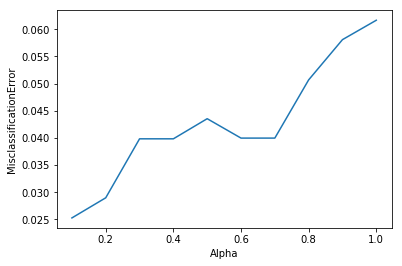

In [431]:
alpha=np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=BernoulliNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}.'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('MisclassificationError')
plt.show()

In [432]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [433]:
y_pred=clf.predict(X_test)

In [435]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

92.4031007752


array([[295,   0],
       [ 49, 301]], dtype=int64)

In [436]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("Top 50 words in ham emails:")
for i in idx[0]:
    print(bow_vect_bin.get_feature_names()[i])
    
print("\n----------------------------\n")
print("Top 50 words in spam emails:")
for i in idx[1]:
    print(bow_vect_bin.get_feature_names()[i])
    

Top 50 words in ham emails:
linguist
univers
languag
inform
one
address
includ
edu
fax
follow
send
interest
english
paper
http
call
research
pleas
confer
discuss
present
list
work
depart
develop
name
www
form
relat
refer
word
email
mani
avail
speaker
post
write
first
two
differ
thank
studi
theori
public
structur
contact
question
abstract
page
general

----------------------------

Top 50 words in spam emails:
free
pleas
http
mail
com
inform
one
address
send
receiv
list
offer
want
day
best
remov
internet
check
week
today
call
order
money
www
includ
mani
name
servic
work
everi
month
start
number
site
need
messag
win
follow
first
easi
state
busi
market
home
cost
help
product
email
avail
subject


In [438]:
f1_score(y_test,pred,average='binary')

0.92473118279569899

### Multinomial with count BOW(Accuracy,Confusion mat,F1 score)

In [439]:
X=bow
y=df['class_label'].values

In [440]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,shuffle=False)


The optimal value of alpha is 0.30000000000000004.


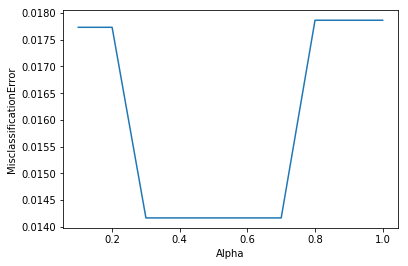

In [441]:
alpha=np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}.'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('MisclassificationError')
plt.show()

In [442]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [443]:
y_pred=clf.predict(X_test)

In [444]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

97.984496124


array([[335,   4],
       [  9, 297]], dtype=int64)

In [445]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("Top 50 words in ham emails:")
for i in idx[0]:
    print(bow_vect.get_feature_names()[i])
    
print("\n----------------------------\n")
print("Top 50 words in spam emails:")
for i in idx[1]:
    print(bow_vect.get_feature_names()[i])

Top 50 words in ham emails:
languag
univers
linguist
paper
confer
edu
english
inform
one
present
word
georgetown
research
fax
address
communic
speech
speaker
discours
mean
interest
theori
depart
follow
discuss
phonolog
abstract
session
send
system
process
form
studi
pleas
call
work
human
registr
analysi
submiss
structur
http
organ
educ
teacher
includ
teach
exampl
case
issu

----------------------------

Top 50 words in spam emails:
order
report
program
send
address
mail
list
receiv
email
name
money
one
busi
http
work
free
com
day
inform
pleas
market
check
week
internet
letter
want
call
win
follow
product
start
remov
everi
read
site
credit
offer
advertis
servic
best
cost
number
need
capitalfm
mani
much
million
includ
www
softwar


In [446]:
f1_score(y_test,pred,average='weighted')

0.92397731670789374

In [447]:
f1_score(y_test,pred,average='micro')

0.92403100775193803

In [448]:
f1_score(y_test,pred,average='macro')

0.92402443333838158

### Mulinomial for tfidf(Accuracy,Confusion mat,F1 score)

In [462]:
X=tf_idf
y=df['class_label'].values

In [491]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,shuffle=False)


The optimal value of alpha is 0.1.


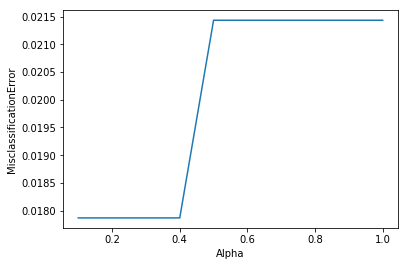

In [492]:
alpha=np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}.'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('MisclassificationError')
plt.show()

In [493]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [494]:
y_pred=clf.predict(X_test)

In [495]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

97.2093023256


array([[327,   1],
       [ 17, 300]], dtype=int64)

In [496]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("Top 50 words in ham emails:")
for i in idx[0]:
    print(tf_idf_vec.get_feature_names()[i])
    
print("\n----------------------------\n")
print("Top 50 words in spam emails:")
for i in idx[1]:
    print(tf_idf_vec.get_feature_names()[i])

Top 50 words in ham emails:
languag
univers
linguist
confer
paper
edu
english
research
phonolog
abstract
inform
speech
discuss
fax
theori
depart
word
phonet
session
one
mean
present
vowel
interest
submiss
gruyter
address
book
communic
speaker
issu
ipa
teach
studi
public
grammar
structur
refer
cultur
post
summari
semant
acquisit
discours
pleas
review
construct
institut
write
georgetown

----------------------------

Top 50 words in spam emails:
report
http
order
com
program
mail
free
list
address
call
site
remov
money
week
send
busi
email
credit
capitalfm
adult
win
receiv
offer
click
day
inform
www
check
want
name
product
internet
pleas
one
work
web
best
market
servic
messag
start
today
phone
game
advertis
month
letter
number
million
visit


In [498]:
f1_score(y_test,pred,average='weighted')

0.92397731670789374

In [500]:
f1_score(y_test,pred,average='micro')

0.92403100775193803

In [501]:
f1_score(y_test,pred,average='macro')

0.92402443333838158

###### From all three methods, Multinomial with Count BOW has better confusion matrix and accuracy.... from all methods values of F1_score are almost similar for same test_size(0.7)